In [2]:
import pandas as pd
import os as os
import json as js
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pickle

#Text Classification Material

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

### Original dataset too large to upload 
Skip to "Start Analysis from here" for running the analysis on pre-processed and pickled subset

In [2]:
os.chdir("C:/Users/MAHAM/Desktop/Studium/Capstone Project/master__thesis")
os.getcwd()

'C:\\Users\\MAHAM\\Desktop\\Studium\\Capstone Project\\master__thesis'

In [13]:
with open ('movies_data', 'rb') as fr:
    movies = pickle.load(fr)

In [14]:
movies.shape

(1697533, 9)

In [15]:
movies.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

#### Select 1000 random movies

In [19]:
import random
random.seed("Capstone")
movies_id = list(set(movies["asin"]))
movies_1000 = random.sample(movies_id, 1000)
movies_1000[:10]

['6304771088',
 'B0007R4TQM',
 'B0012Z363A',
 'B001993YB8',
 'B00005OW00',
 'B000AYELC4',
 'B0009S4J1E',
 'B003ZXNCA4',
 '079283755X',
 'B00006ADES']

In [24]:
movies_sdf2=[movies.iloc[i] for i in range(len(movies)) if movies.iloc[i][1] in movies_1000]
movies_sdf2=pd.DataFrame(movies_sdf2)

In [25]:
# Pickle
with open ('movies_sdf2', 'wb') as fw:
    pickle.dump(movies_sdf2, fw)

In [3]:
# Unpickle
with open ('movies_sdf2', 'rb') as fr:
    movies_sdf2 = pickle.load(fr)

In [4]:
movies_sdf2.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
len(set(movies_sdf2.asin)), len((movies_sdf2.asin)) 

(1000, 32991)

In [33]:
import csv
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pegah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Adding personality features (compare with data preparation file)
dataframes = [movies_sdf2]
letters = ["E", "A", "N", "O", "C"]
big5 = ["Extro", "Agree", "Neuro", "Open", "Consc"]
for df in dataframes:
    for column in big5:
        df[column]=df["overall"]
    for j,letter in enumerate(letters):
        reader = csv.reader(open('%s.top100.1to3grams.gender_age_controlled.rmatrix.csv'%(letter), 'r'))
        dic = {}
        for row in reader:
            k, v, z= row
            dic[k] = v
        dic.pop("")
        for i in range(len(df)):
            text = df.iloc[i, df.columns.get_loc("reviewText")]
            tokens = nltk.word_tokenize(text.lower())
            text = nltk.Text(tokens)
            word_value = 0
            for word, value in dic.items():
                counter = text.count(word)
                word_value = word_value+(counter*float(value))
            #current_length = len(df.columns)
            personality_number = word_value#/((df.iloc[i,df.columns.get_loc("length")])+0.0001)
            df.iloc[i, df.columns.get_loc(big5[j])] = personality_number

In [6]:
# Pickle
movies_2 = movies_sdf2
with open ('movies_2', 'wb') as fw:
    pickle.dump(movies_2, fw)

## Start Analysis from here

In [8]:
# Unpickle
with open ('movies_2', 'rb') as fr:
    movies_2 = pickle.load(fr)

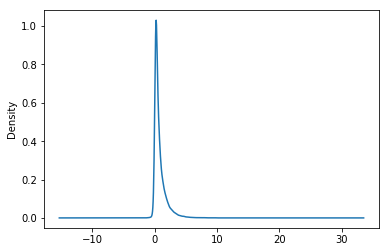

In [9]:
median_O = movies_2.loc[:,"Open"].median()
median_N = movies_2.loc[:,"Neuro"].median()
movies_2.loc[:,"Open"].plot("kde")

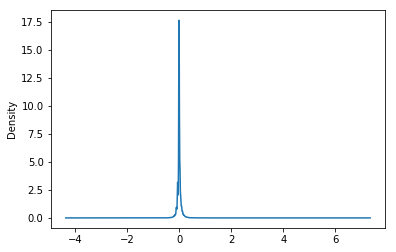

In [10]:
movies_2.loc[:,"Neuro"].plot("kde");

In [27]:
unique_movies= movies_2.groupby(["asin"],as_index=False).mean()
unique_movies["overall"].corr(unique_movies["Open"])
#unique_movies.shape

-0.173409051188685

In [15]:
movies_2=movies_2.reset_index()
movies_2.head(2)

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Extro,Agree,Neuro,Open,Consc,high_O,high_N
0,0,109,AJSYTZQVJJOYW,0005119367,A. Abela,"[1, 1]","A truly wonderfully made film, mostly accurate...",4.0,Wonderful!!!,1152144000,"07 6, 2006",-0.118680,0.000000,0.0,0.245088,-0.042668,0,1
1,1,110,A1QNGKV688Q8TE,0005119367,Aaron D. Koehler,"[1, 1]",Joseph is amazing story to read and watch. A ...,5.0,Joseph,1272672000,"05 1, 2010",-0.104591,0.056682,0.0,0.413850,0.000000,0,1


### Create additional dummy variable for above median openness

In [26]:
movies_2["high_O"] = [1 if movies_2.loc[i, "Open"]>=median_O else 0 for i in range(len(movies_2))]

In [17]:
len(unique_movies)

1000

### Add variables for the number and average values of ratings for above and below median openness

In [23]:
movies_1000 = list(set(movies_2.asin))
movies_1000[:10]

['630284357X',
 'B00006LPG9',
 'B0003JAOPO',
 'B001R0AYI0',
 'B002WY65V0',
 '6302725798',
 '6304331908',
 'B000XUF6MY',
 '6303093493',
 'B00006JDSW']

In [28]:
d = {"Movie Title":movies_1000}
columns=["Movie Title",
         "Rating_H_O","Rating_L_O",
         "Number_H_O","Number_L_O"]
unique = pd.DataFrame(data=d, index=range(1000),columns=columns)
unique.head()

,Movie Title,Rating_H_O,Rating_L_O,Number_H_O,Number_L_O
0,630284357X,NaN,NaN,NaN,NaN
1,B00006LPG9,NaN,NaN,NaN,NaN
2,B0003JAOPO,NaN,NaN,NaN,NaN
3,B001R0AYI0,NaN,NaN,NaN,NaN
4,B002WY65V0,NaN,NaN,NaN,NaN


In [29]:
unique.head()

,Movie Title,Rating_H_O,Rating_L_O,Number_H_O,Number_L_O
0,630284357X,NaN,NaN,NaN,NaN
1,B00006LPG9,NaN,NaN,NaN,NaN
2,B0003JAOPO,NaN,NaN,NaN,NaN
3,B001R0AYI0,NaN,NaN,NaN,NaN
4,B002WY65V0,NaN,NaN,NaN,NaN


In [30]:
# Add variables for the number and values of ratings for above and below median openness
for title in movies_1000:
    for letter in ["O"]:
        unique.loc[unique["Movie Title"]==title,"Rating_H_"+letter] = movies_2.loc[(movies_2.asin == title) & (movies_2["high_"+letter]==1),"overall"].mean()
        unique.loc[unique["Movie Title"]==title,"Rating_L_"+letter] = movies_2.loc[(movies_2.asin == title) & (movies_2["high_"+letter]==0),"overall"].mean()
        unique.loc[unique["Movie Title"]==title,"Number_H_"+letter] = movies_2[(movies_2["high_"+letter] == 1) & (movies_2.asin == title)].count()["index"]
        unique.loc[unique["Movie Title"]==title,"Number_L_"+letter] = movies_2[(movies_2["high_"+letter] == 0) & (movies_2.asin == title)].count()["index"]

In [31]:
#Calculate the difference in rating
for letter in ["O"]:
    unique["diff_"+letter]=unique["Rating_H_"+letter]-unique["Rating_L_"+letter]

In [33]:
type(unique.loc[1,"Rating_H_O"])

float

In [34]:
unique["Number_L_O"].describe()

count     1000
unique     101
top          3
freq       114
Name: Number_L_O, dtype: int64

### Select only those movies with at least 30 reviews from both groups and a difference of at least 0.5

In [45]:
# Returns a list with movies that fulfil the conditions.
# The same can be done with a positive difference
unique_enough = unique[(unique["Number_H_O"]>30)&(unique["Number_L_O"]>30)&(unique["diff_O"]<-0.5)]
unique_enough.head(20)

,Movie Title,Rating_H_O,Rating_L_O,Number_H_O,Number_L_O,diff_O
37,6304100507,3.97561,4.66176,41,68,-0.686155
149,B001PUTN3Y,3.725,4.36111,40,36,-0.636111
159,B00005JPFX,3.47917,4.26562,192,192,-0.786458
247,6305892806,3.63333,4.21642,120,134,-0.583085
471,B008JFUPPI,3.03419,3.59877,117,324,-0.564577
474,B00H9LHVHI,3.64151,4.26126,53,111,-0.619752
550,B00005QW5Y,3.4878,4.25532,82,47,-0.767514
600,6300216381,3.97143,4.66,35,50,-0.688571
662,B00005JPH2,3.73718,4.41406,156,128,-0.676883
721,B00003CXTL,2.76923,3.45238,52,42,-0.683150


## As we can see "Mortal Kombat II" (corresponding ASIN 0780621964) has a difference of almost -1 (third last row in table above).
